# Spectral Estimation of Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## The Welch Method

In the previous section it has been shown that the [periodogram](periodogram.ipynb), as a non-parametric estimator of the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a random signal $x[k]$, is not consistent. This is due to the fact that its variance does not converge towards zero even when the length of the random signal is increased towards infinity. In order to overcome this problem, the [Bartlett method](https://en.wikipedia.org/wiki/Bartlett's_method) and [Welch method](https://en.wikipedia.org/wiki/Welch's_method) 

1. split the random signal into segments, 
2. estimate the PSD for each segment, and 
3. average over these local estimates. 

The averaging reduces the variance of the estimated PSD. While Barlett's method uses non-overlapping segments, Welch's is a generalization using windowed overlapping segments. As before we assume a weakly ergodic real-valued random process for the discussion of Welch's method.

### Derivation

Let's assume that we split the random signal $x[k]$ into $L$ overlapping segments $x_l[k]$ of length $N$ with $0\leq l\leq L-1$, starting at multiples of the stepsize $M \in {1,2, \dots, N}$. These segments are then windowed by the window $w[k]$ of length $N$, resulting in a windowed $l$-th segment. The discrete time Fourier transformation (DTFT) $X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the windowed $l$-th segment is thus given as 

$$ X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = 0}^{N-1} x[k + l \cdot M] \, w[k] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}$$

where the window $w[k]$ defined within $0\leq k\leq N-1$ should be normalized as $\frac{1}{N} \sum\limits_{k=0}^{N-1} | w[k] |^2 = 1$. The stepsize $M$ determines the overlap between the segments. In general $N-M$ number of samples overlap between adjacent segments, for $M = N$ no overlap occurs. The overlap is sometimes given as ratio $\frac{N-M}{N}\cdot 100\%$. 

Introducing $X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ into the definition of the periodogram yields the periodogram of the $l$-th segment

$$ \hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \,| X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2 $$

The estimated PSD is then given by averaging over the segment's periodograms $\hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ 

$$ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{L} \sum_{l = 0}^{L-1} \hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$$

Note, that the total number $L$ of segments has to be chosen such that the last required sample $(L-1)\cdot M + N - 1$ does not exceed the total length of the random signal. Otherwise the last segment $x_{L-1}[k]$ may also be zeropadded towards length $N$.

The Bartlett method uses a rectangular window and non-overlapping segments. The Welch method uses overlapping segments and a window that must be chosen according to the intended spectral analysis task.

### Example

The following example is equivalent to the [periodogram example](periodogram.ipynb#Example). We aim at estimating the PSD of a random process which draws samples from normal distributed white noise with zero-mean and unit variance. The true PSD is given as $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$.

Mean value of the periodogram: 0.997852


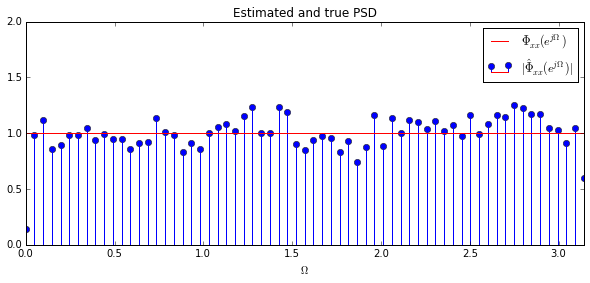

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 128  # length of segments
M = 64  # stepsize
L = 100  # total number of segments

# generate random signal
x = np.random.normal(size=L*M)

# compute periodogram by Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  # due to normalization in scipy.signal
Om = 2*np.pi*nf

# plot results
plt.figure(figsize=(10,4))
plt.stem(Om, Pxx, 'b', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(Om, np.ones_like(Pxx), 'r', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated and true PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# compute mean value of the periodogram
print('Mean value of the periodogram: %f' %np.mean(np.abs(Pxx)))

**Exercise**

* Compare the results to the periodogram example. Is the variance of the estimator lower?
* Change the number of segments `L` and check if the variance reduces further
* Change the segment length `N` and stepsize `M`. What changes?

### Evaluation

It is shown in [[Stoica et al.](../index.ipynb#Literature)] that Welch's method is asymptotically unbiased. Under the assumption of a weakly stationary random process, the periodograms $\hat{\Phi}_{xx,l}(e^{j \Omega})$ of the segments can be assumed to be approximately uncorrelated. Hence, averaging over these reduces the variance of the estimator. It can be shown formally that in the limiting case of an infinitely number of segments (infintely long signal) the variance tends to zero. As a result Welch's method is an asymptotically consistent estimator of the PSD. 

For a finite segment length $N$, the properties of the estimated PSD $\hat{\Phi}_{xx}(e^{j \Omega})$ depend on the length $N$ of the segments and the window function $w[k]$ due to the [leakage effect](../spectral_analysis_deterministic_signals/leakage_effect.ipynb).

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>